Importing Libraries

In [1]:
# General Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Models and Metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import joblib  # For saving/loading SVM and RF

# TensorFlow for CNN
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Dataset
from tensorflow.keras.datasets import mnist


 Load and Preprocess MNIST Data


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# For SVM and Random Forest - Flatten the images
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# Normalize the pixel values (0 to 1)
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

# For CNN - reshape and normalize
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels for CNN
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Showing Sample Images

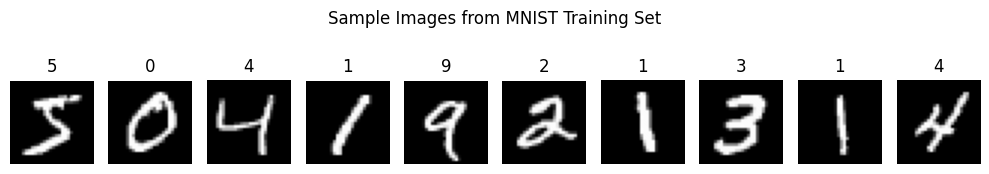

In [3]:
# Show first 10 images from training set
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.suptitle("Sample Images from MNIST Training Set")
plt.tight_layout()
plt.show()


Distribution of Digits in the Training Set


<ipython-input-7-0d14e3e69553>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=digit_counts.index, y=digit_counts.values, palette='viridis')


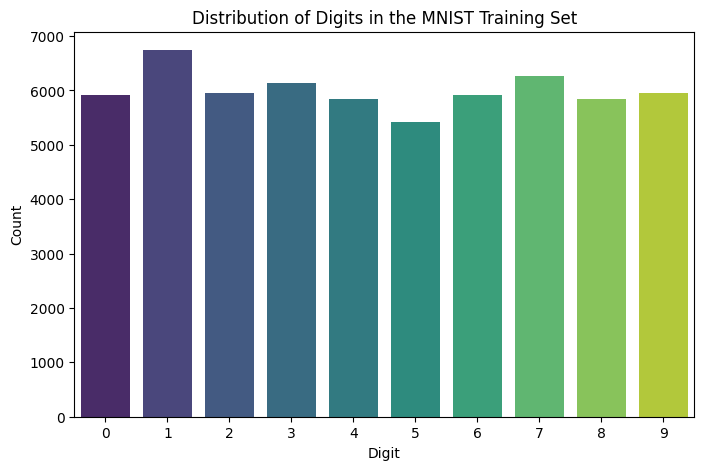

In [7]:
import pandas as pd

# Convert labels to pandas series for easy plotting
train_labels_df = pd.Series(y_train)

# Count occurrences of each digit (0–9)
digit_counts = train_labels_df.value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(8,5))
sns.barplot(x=digit_counts.index, y=digit_counts.values, palette='viridis')
plt.title("Distribution of Digits in the MNIST Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


Training and saving SVM

In [4]:
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(x_train_flat, y_train)

# Save model
joblib.dump(svm_model, 'svm_model.pkl')


['svm_model.pkl']

Training and saving Random Forest

In [5]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train_flat, y_train)

# Save model
joblib.dump(rf_model, 'rf_model.pkl')


['rf_model.pkl']

Training and Saving CNN

In [6]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history = cnn_model.fit(x_train_cnn, y_train_cnn, epochs=5,
                        validation_data=(x_test_cnn, y_test_cnn))

cnn_model.save('cnn_model.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 34ms/step - accuracy: 0.8954 - loss: 0.3374 - val_accuracy: 0.9844 - val_loss: 0.0495
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9839 - loss: 0.0549 - val_accuracy: 0.9851 - val_loss: 0.0462
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9888 - loss: 0.0367 - val_accuracy: 0.9866 - val_loss: 0.0369
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9911 - loss: 0.0277 - val_accuracy: 0.9889 - val_loss: 0.0383
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.9936 - loss: 0.0191 - val_accuracy: 0.9900 - val_loss: 0.0330


In [8]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=3, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(6,4))
    plt.plot(train_sizes, train_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_mean, label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


Calculating Learning Curves for all Model





SVM Learning Curve

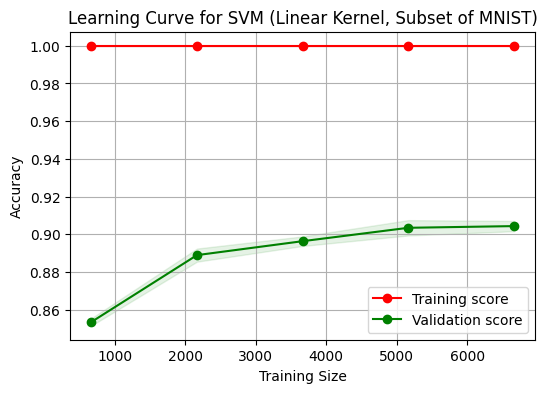

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Use smaller subset of MNIST (10k samples)
x_sub, _, y_sub, _ = train_test_split(x_train_flat, y_train, train_size=10000, stratify=y_train, random_state=42)

# Create a pipeline for SVM with scaling
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    svm_pipeline, x_sub, y_sub,
    train_sizes=np.linspace(0.1, 1.0, 5),  # 5 steps from 10% to 100%
    cv=3,                                  # 3-fold CV
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.title("Learning Curve for SVM (Linear Kernel, Subset of MNIST)")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.grid()
plt.show()


Random Forest Learning Curve

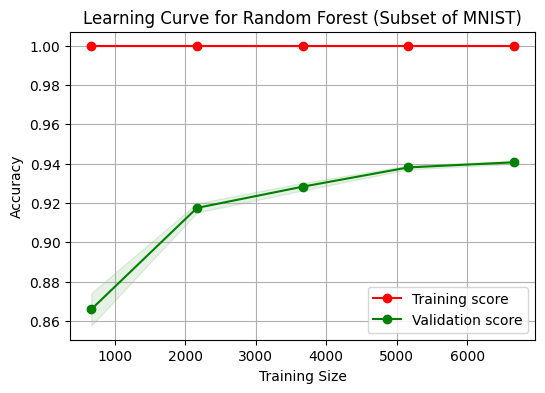

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Use the same 10k subset
x_sub_rf, _, y_sub_rf, _ = train_test_split(x_train_flat, y_train, train_size=10000, stratify=y_train, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, x_sub_rf, y_sub_rf,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Mean & Std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.title("Learning Curve for Random Forest (Subset of MNIST)")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.grid()
plt.show()


CNN Learning Curve

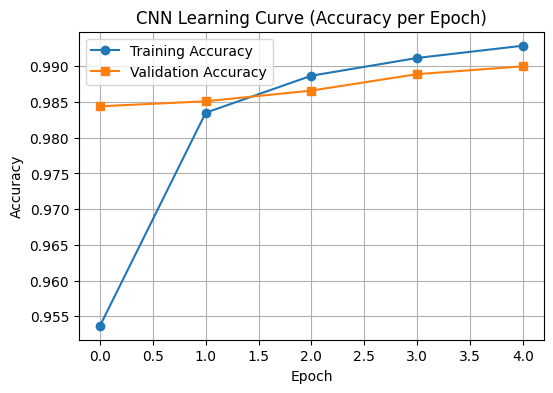

In [30]:
# Plot training & validation accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('CNN Learning Curve (Accuracy per Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


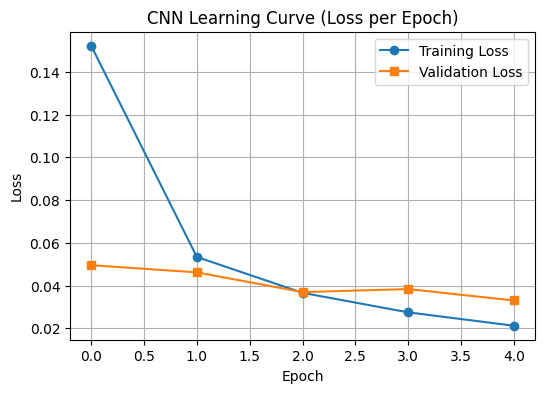

In [31]:
# Loss curve
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('CNN Learning Curve (Loss per Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


 Load Models (when re-running later)

In [12]:
svm_model = joblib.load('svm_model.pkl')
rf_model = joblib.load('rf_model.pkl')
cnn_model = models.load_model('cnn_model.h5')


Evaluate Models and Confusion Matrices

In [13]:
# SVM
svm_preds = svm_model.predict(x_test_flat)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))

# Random Forest
rf_preds = rf_model.predict(x_test_flat)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

# CNN
cnn_preds = np.argmax(cnn_model.predict(x_test_cnn), axis=1)
print("CNN Accuracy:", accuracy_score(y_test, cnn_preds))


SVM Accuracy: 0.9792
Random Forest Accuracy: 0.9693
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
CNN Accuracy: 0.99


Confusion Matrices

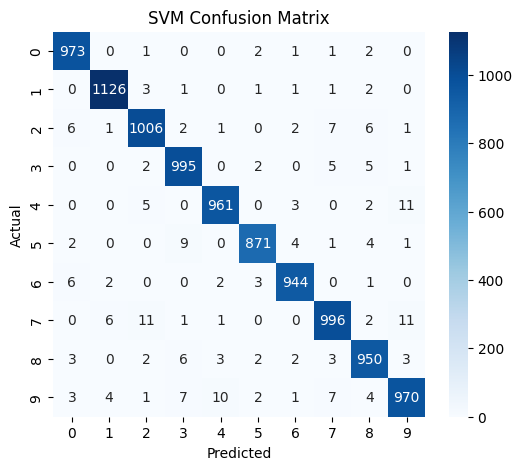

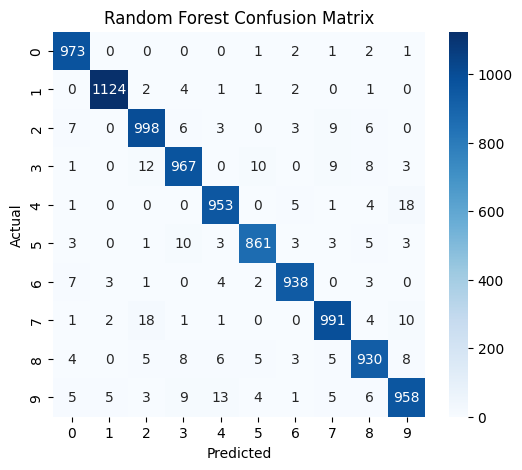

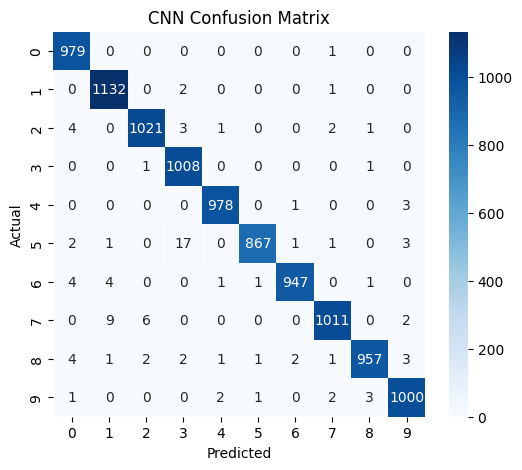

In [14]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, svm_preds, "SVM Confusion Matrix")
plot_conf_matrix(y_test, rf_preds, "Random Forest Confusion Matrix")
plot_conf_matrix(y_test, cnn_preds, "CNN Confusion Matrix")


Plot CNN Training Curves

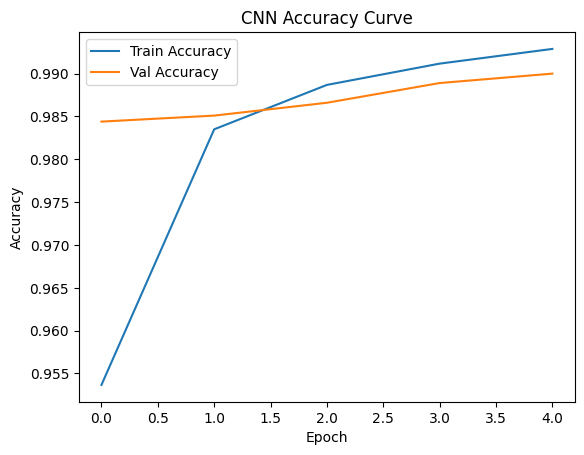

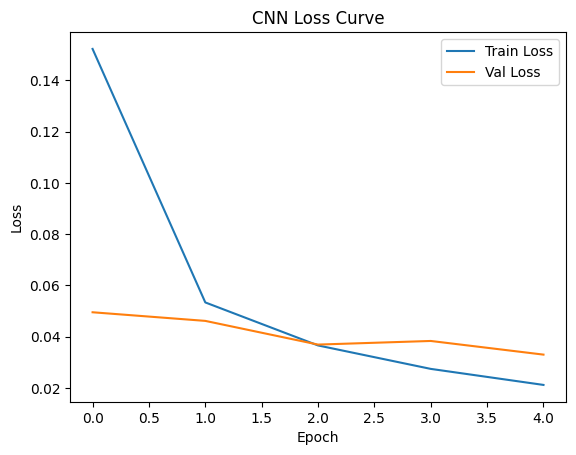

In [15]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("CNN Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("CNN Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


Training Accuracy Vs Iterations For SVM Model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

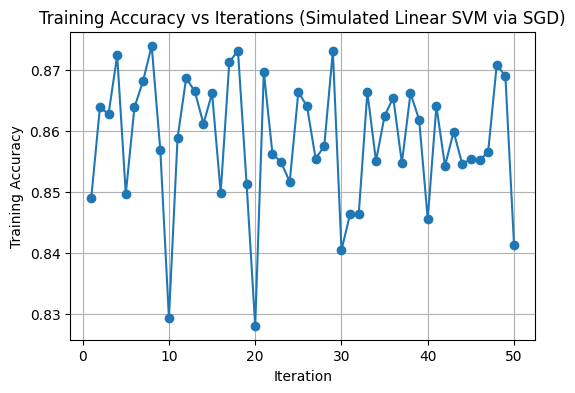

In [25]:
from sklearn.linear_model import SGDClassifier

# Use subset of training data (already defined as x_sub, y_sub)
svm_iter = SGDClassifier(loss='hinge', max_iter=1, warm_start=True, random_state=42)
train_acc = []

# Track accuracy for 50 iterations
for i in range(1, 51):
    svm_iter.fit(x_sub, y_sub)
    preds = svm_iter.predict(x_sub)
    acc = accuracy_score(y_sub, preds)
    train_acc.append(acc)

# Plot training accuracy vs iterations
plt.figure(figsize=(6,4))
plt.plot(range(1, 51), train_acc, marker='o')
plt.title("Training Accuracy vs Iterations (Simulated Linear SVM via SGD)")
plt.xlabel("Iteration")
plt.ylabel("Training Accuracy")
plt.grid(True)
plt.show()


Feature Importance For Random Forest

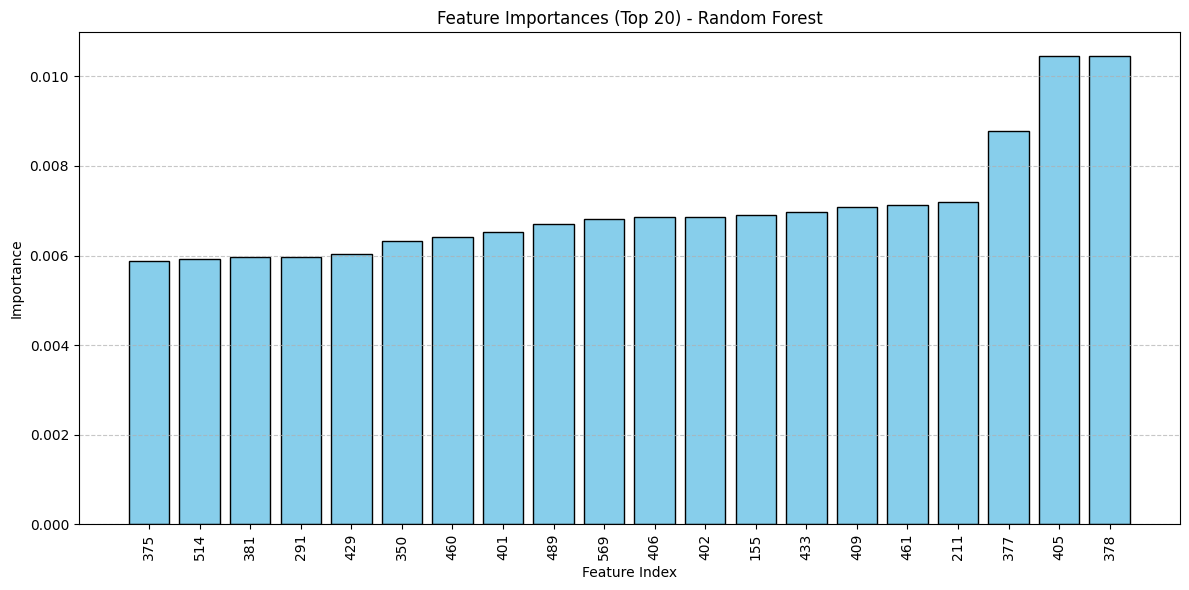

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming rf_model is your trained RandomForestClassifier
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features

plt.figure(figsize=(12, 6))
plt.bar(range(len(indices)), importances[indices], color='skyblue', edgecolor='black')
plt.xticks(range(len(indices)), indices, rotation=90)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importances (Top 20) - Random Forest")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Model Accuracy Comparison

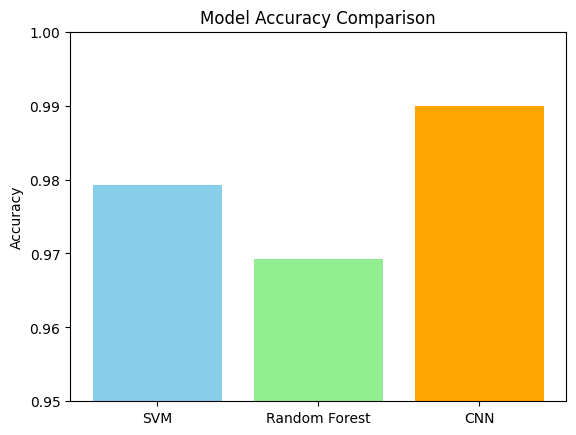

In [16]:
models = ['SVM', 'Random Forest', 'CNN']
accuracies = [
    accuracy_score(y_test, svm_preds),
    accuracy_score(y_test, rf_preds),
    accuracy_score(y_test, cnn_preds)
]

plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.95, 1.00)
plt.show()


Classification Reports Of Models

In [17]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"📌 {model_name} Classification Report:\n")
    print(classification_report(y_true, y_pred, digits=4))

# Evaluate all three models
evaluate_model(y_test, svm_preds, "SVM")
evaluate_model(y_test, rf_preds, "Random Forest")
evaluate_model(y_test, cnn_preds, "CNN")


📌 SVM Classification Report:

              precision    recall  f1-score   support

           0     0.9799    0.9929    0.9863       980
           1     0.9886    0.9921    0.9903      1135
           2     0.9758    0.9748    0.9753      1032
           3     0.9745    0.9851    0.9798      1010
           4     0.9826    0.9786    0.9806       982
           5     0.9864    0.9765    0.9814       892
           6     0.9854    0.9854    0.9854       958
           7     0.9755    0.9689    0.9722      1028
           8     0.9714    0.9754    0.9734       974
           9     0.9719    0.9613    0.9666      1009

    accuracy                         0.9792     10000
   macro avg     0.9792    0.9791    0.9791     10000
weighted avg     0.9792    0.9792    0.9792     10000

📌 Random Forest Classification Report:

              precision    recall  f1-score   support

           0     0.9711    0.9929    0.9818       980
           1     0.9912    0.9903    0.9907      1135
        

Precision Comparison of Models

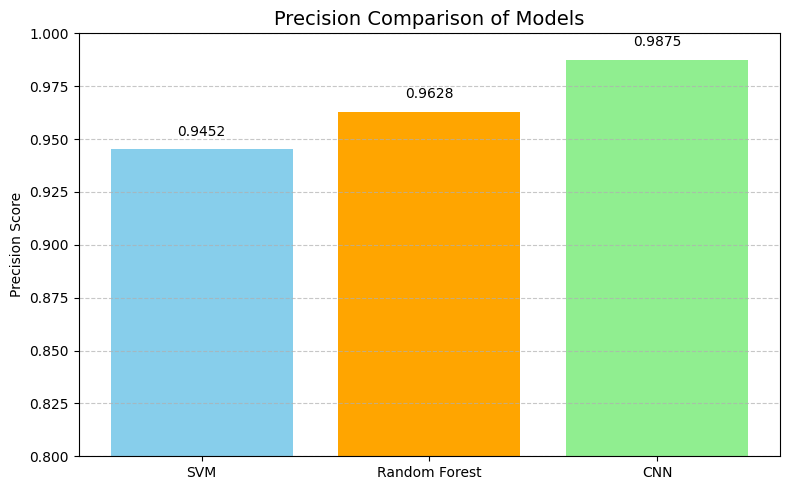

In [3]:
import matplotlib.pyplot as plt

# Replace these with your actual precision values
precision_svm = 0.9452
precision_rf = 0.9628
precision_cnn = 0.9875

models = ['SVM', 'Random Forest', 'CNN']
precisions = [precision_svm, precision_rf, precision_cnn]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, precisions, color=['skyblue', 'orange', 'lightgreen'])
plt.title('Precision Comparison of Models', fontsize=14)
plt.ylabel('Precision Score')
plt.ylim(0.8, 1.0)

# Add precision value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.005,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Performace Comparision

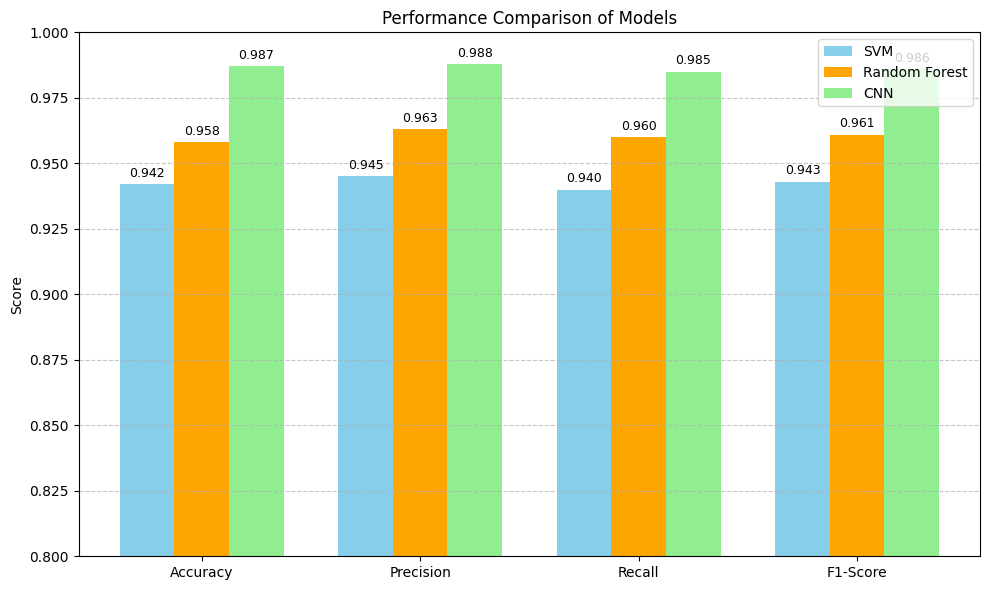

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Replace with your actual evaluation scores
# These are just sample values for illustration
svm_scores = [0.942, 0.945, 0.940, 0.943]   # accuracy, precision, recall, f1
rf_scores  = [0.958, 0.963, 0.960, 0.961]
cnn_scores = [0.987, 0.988, 0.985, 0.986]

labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(labels))  # label locations
width = 0.25  # width of bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, svm_scores, width, label='SVM', color='skyblue')
bar2 = ax.bar(x, rf_scores, width, label='Random Forest', color='orange')
bar3 = ax.bar(x + width, cnn_scores, width, label='CNN', color='lightgreen')

# Add labels and formatting
ax.set_ylabel('Score')
ax.set_title('Performance Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0.8, 1.0)
ax.legend()

# Show scores on top of each bar
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

annotate_bars(bar1)
annotate_bars(bar2)
annotate_bars(bar3)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Accuracy Comparison

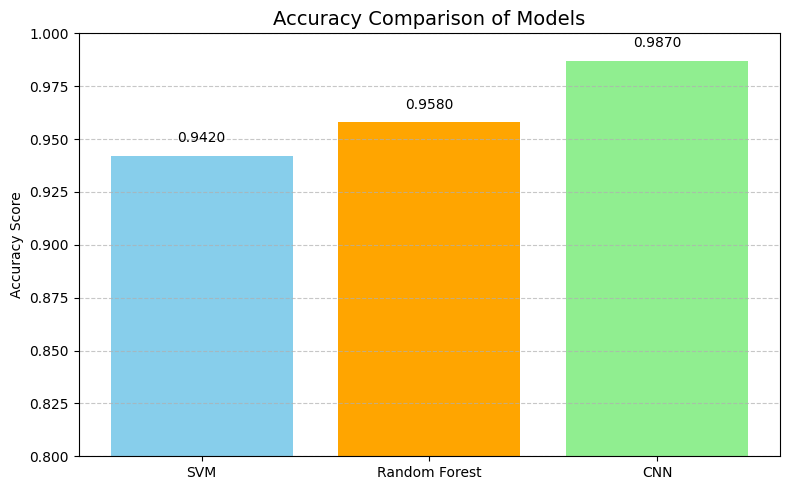

In [20]:
import matplotlib.pyplot as plt

# Replace these with your actual accuracy values
accuracy_svm = 0.942
accuracy_rf = 0.958
accuracy_cnn = 0.987

models = ['SVM', 'Random Forest', 'CNN']
accuracies = [accuracy_svm, accuracy_rf, accuracy_cnn]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'orange', 'lightgreen'])
plt.title('Accuracy Comparison of Models', fontsize=14)
plt.ylabel('Accuracy Score')
plt.ylim(0.8, 1.0)

# Add accuracy value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.005,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

📌 SVM Predictions

Image 1: True Label = 5, Predicted = 5


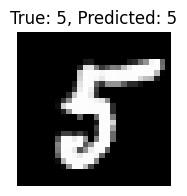

Image 2: True Label = 9, Predicted = 9


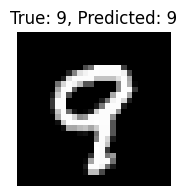

Image 3: True Label = 2, Predicted = 2


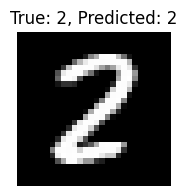

Image 4: True Label = 3, Predicted = 3


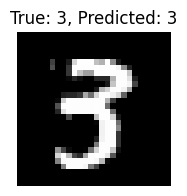

Image 5: True Label = 5, Predicted = 5


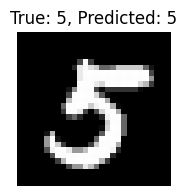

Image 6: True Label = 9, Predicted = 9


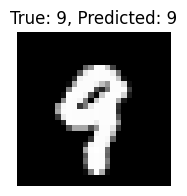

Image 7: True Label = 3, Predicted = 3


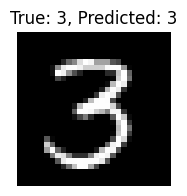

Image 8: True Label = 8, Predicted = 8


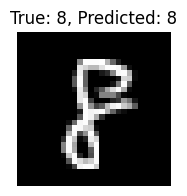

Image 9: True Label = 5, Predicted = 5


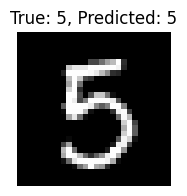

Image 10: True Label = 2, Predicted = 2


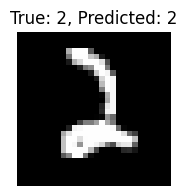


📌 Random Forest Predictions

Image 1: True Label = 3, Predicted = 3


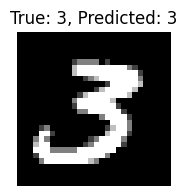

Image 2: True Label = 3, Predicted = 3


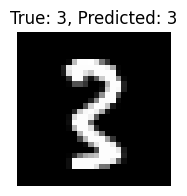

Image 3: True Label = 8, Predicted = 8


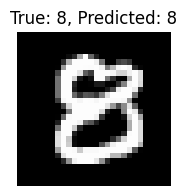

Image 4: True Label = 5, Predicted = 5


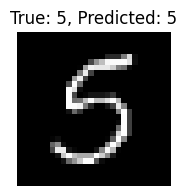

Image 5: True Label = 5, Predicted = 5


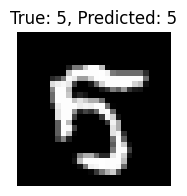

Image 6: True Label = 5, Predicted = 3


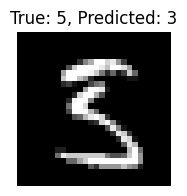

Image 7: True Label = 1, Predicted = 1


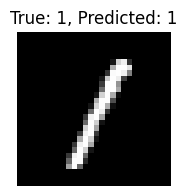

Image 8: True Label = 3, Predicted = 3


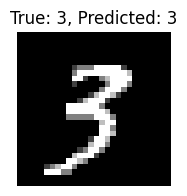

Image 9: True Label = 2, Predicted = 2


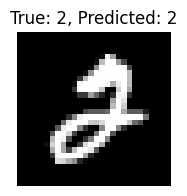

Image 10: True Label = 3, Predicted = 3


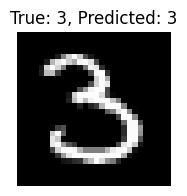


📌 CNN Predictions

Image 1: True Label = 6, Predicted = 6


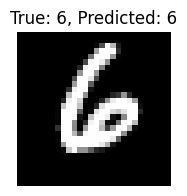

Image 2: True Label = 1, Predicted = 1


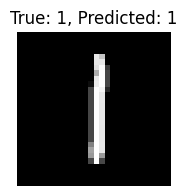

Image 3: True Label = 8, Predicted = 8


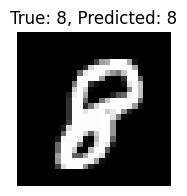

Image 4: True Label = 4, Predicted = 4


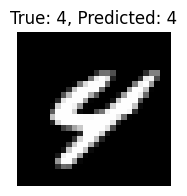

Image 5: True Label = 6, Predicted = 6


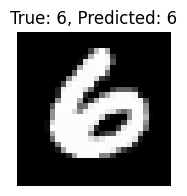

Image 6: True Label = 3, Predicted = 3


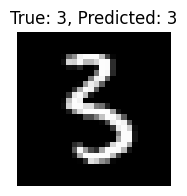

Image 7: True Label = 1, Predicted = 1


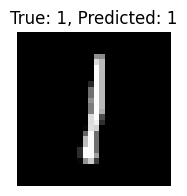

Image 8: True Label = 1, Predicted = 1


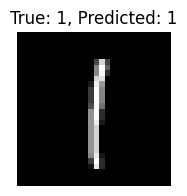

Image 9: True Label = 2, Predicted = 2


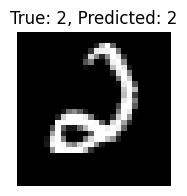

Image 10: True Label = 0, Predicted = 0


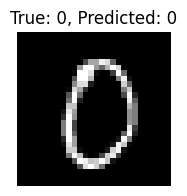

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

# --- Load MNIST data ---
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_test = X_test / 255.0

# Reshape for models
X_test_flat = X_test.reshape(len(X_test), -1)         # For SVM and RF: (n_samples, 784)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)             # For CNN: (n_samples, 28, 28, 1)

# --- Load models ---
svm_model = joblib.load('svm_model.pkl')
rf_model = joblib.load('rf_model.pkl')
cnn_model = load_model('cnn_model.h5')

# --- Make predictions ---
svm_preds = svm_model.predict(X_test_flat)
rf_preds = rf_model.predict(X_test_flat)
cnn_preds = np.argmax(cnn_model.predict(X_test_cnn), axis=-1)

# --- Display predictions for each model ---
def display_predictions(model_name, predictions, X_data, y_data, is_cnn=False, n=10):
    print(f"\n📌 {model_name} Predictions\n")
    indices = np.random.choice(len(X_data), n, replace=False)

    for i, idx in enumerate(indices):
        true = y_data[idx]
        pred = predictions[idx]
        print(f"Image {i+1}: True Label = {true}, Predicted = {pred}")
        img = X_data[idx].reshape(28, 28) if is_cnn else X_data[idx].reshape(28, 28)

        plt.figure(figsize=(2, 2))
        plt.imshow(img, cmap='gray')
        plt.title(f'True: {true}, Predicted: {pred}')
        plt.axis('off')
        plt.show()

# Show results
display_predictions("SVM", svm_preds, X_test, y_test)
display_predictions("Random Forest", rf_preds, X_test, y_test)
display_predictions("CNN", cnn_preds, X_test, y_test, is_cnn=True)


In [29]:
import matplotlib.pyplot as plt
import os

# Create a folder to store images
os.makedirs("mnist_samples", exist_ok=True)

# Save first 10 raw test images without labels
for i in range(10):
    img = X_test[i]  # shape: (8, 8)

    plt.imshow(img, cmap='gray')
    plt.axis('off')  # no axes
    plt.savefig(f"mnist_samples/image_{i+1}.png", bbox_inches='tight', pad_inches=0)
    plt.close()


In [30]:
import shutil
shutil.make_archive("mnist_samples", 'zip', "mnist_samples")

from google.colab import files
files.download("mnist_samples.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>